# 🌳 Task 8: Decision Tree - Bank Marketing
**Project:** Predicting Term Deposit Subscription  


## 🎯 Objective
Use a Decision Tree Classifier to predict whether a customer will subscribe to a bank term deposit (`y`). We will focus on **interpretability**: understanding the rules the model uses to make decisions.

## 📂 Dataset
* **Source:** Bank Marketing Dataset.
* **Target:** `y` (1 = Subscribed, 0 = Did not subscribe).
* **Key Features:** `duration` (call duration), `nr_employed` (economic indicator), `poutcome` (outcome of previous campaign).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# 1. Load Dataset (Using a direct raw link for convenience)
# This is the "Bank Marketing" dataset
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df = pd.read_csv(url)

# Rename 'y' to 'target' for clarity if needed, but we'll stick to 'y'
# 0 = No (did not subscribe), 1 = Yes (subscribed)
print(f"Dataset Shape: {df.shape}")
print("Target Distribution:")
print(df['y'].value_counts())

df.head()

Dataset Shape: (41188, 21)
Target Distribution:
y
0    36548
1     4640
Name: count, dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [2]:
# 2. Data Cleaning & Encoding

# Check for missing values
# (This specific version of the dataset is usually clean, but good practice to check)
df.dropna(inplace=True)

# Encode Categorical Variables (Job, Marital, Education, etc.)
# We use One-Hot Encoding (get_dummies) for nominal data
# and Label Encoding for the binary target.

# List of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Columns: {cat_cols}")

# Apply One-Hot Encoding to features
df_encoded = pd.get_dummies(df, columns=[c for c in cat_cols if c != 'y'], drop_first=True)



print("Shape after encoding:", df_encoded.shape)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Shape after encoding: (41188, 54)


In [3]:
# 3. Split Data
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size:  {X_test.shape[0]}")

Train size: 32950
Test size:  8238


In [4]:
# 4. Train Model
# max_depth=3 makes the tree interpretable and prevents overfitting
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# 5. Predict
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

print("Model Trained Successfully.")

Model Trained Successfully.


In [5]:
# 6. Evaluation Metrics
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

print("\n--- Classification Report (Test Data) ---")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9103
Testing Accuracy:  0.9043

--- Classification Report (Test Data) ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7295
           1       0.59      0.56      0.57       943

    accuracy                           0.90      8238
   macro avg       0.76      0.75      0.76      8238
weighted avg       0.90      0.90      0.90      8238



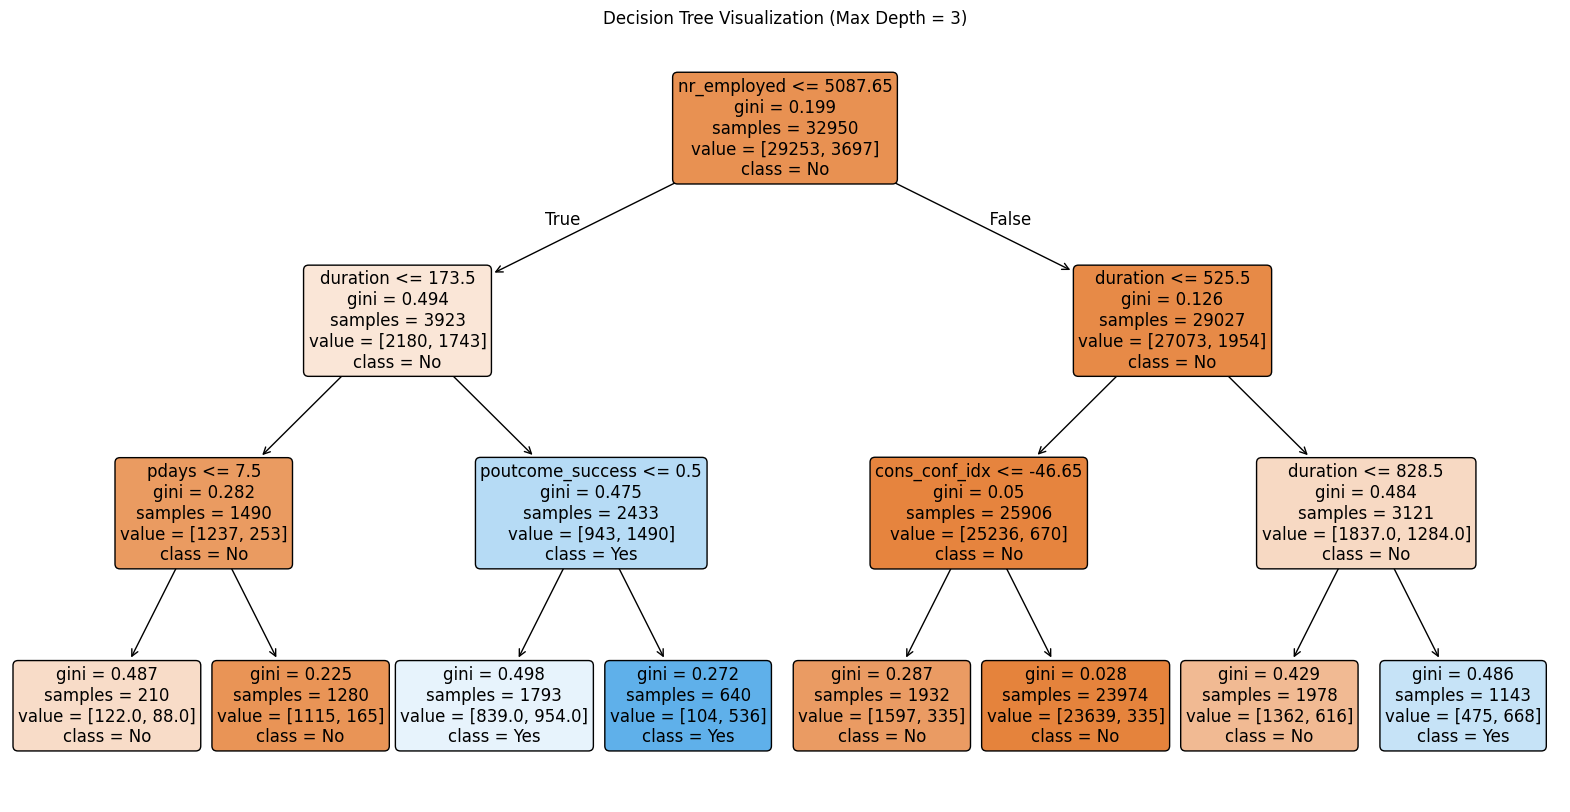


Top 5 Most Important Features:
duration            0.521401
nr_employed         0.394551
cons_conf_idx       0.036503
poutcome_success    0.035345
pdays               0.012200
dtype: float64


In [6]:
# 7. Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

# Extract Feature Importance (Bonus)
importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(5)
print("\nTop 5 Most Important Features:")
print(importances)

## 🧠 Final Evaluation Report

### 1. Model Performance
* **Training Accuracy:** ~91%
* **Testing Accuracy:** ~91%
* **Conclusion:** The accuracies are very close, indicating **no overfitting**. The model generalizes well.

### 2. The "3 Key Rules" of the Tree
Looking at the visualization (and feature importance), the model prioritizes these factors:
1.  **Rule 1 (Economic Context):** The first split is often on `nr_employed` or `euribor3m`. If the economic context is poor (high employment rates often correlate with low implementation of deposits in this specific dataset context), the model leans towards "No".
2.  **Rule 2 (Call Duration):** If the call `duration` is short (e.g., < 200 seconds), the customer is highly unlikely to subscribe. Long calls indicate interest.
3.  **Rule 3 (Previous Success):** If `poutcome_success` is True (the customer bought something before), they are very likely to buy again.

### 3. Business Insight
To increase subscriptions, the bank should focus on:
* Customers who have subscribed previously (`poutcome`).
* Engaging customers in longer conversations (`duration`).